In [107]:
# Median filter

import numpy as np
import matplotlib.pyplot as plt

# Load data 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import utm

player_id = 666

# Load data
df = pd.read_csv("DATOS/PRUEBA_4_10_2023/joint_data.csv")


interval_of_lat = (37.4101990, 37.4106198)
interval_of_lon = (-6.0025772, -6.0021329)


df_player = df[df['player_id'] == player_id]

# Print the number of rows
print(f"Number of points for player {player_id}: {len(df_player)}")


# Filter out the rows ion the interval of lat lon
df_player = df_player[(df_player['lat'] > interval_of_lat[0]) & (df_player['lat'] < interval_of_lat[1])]
df_player = df_player[(df_player['lon'] > interval_of_lon[0]) & (df_player['lon'] < interval_of_lon[1])]

res = utm.from_latlon(np.asarray(df_player['lat']), np.asarray(df_player['lon']))

res_0= utm.from_latlon(interval_of_lat[0], interval_of_lon[0])

df_player['X'] = res[0]-res_0[0]
df_player['Y'] = res[1]-res_0[1]

# Add random outliers

df_player['X'] = df_player['X'] + np.random.rand(len(df_player))
for _ in range(50):
    df_player.loc[np.random.randint(14000,22000), 'X'] += np.random.randint(-20,20)*np.random.rand()

df_player['Y'] = df_player['Y'] + np.random.rand(len(df_player))
for _ in range(50):
    df_player.loc[np.random.randint(14000,22000), 'Y'] += np.random.randint(-20,20)*np.random.rand()



Number of points for player 666: 22326


In [108]:
plt.style.use('seaborn-whitegrid')

C:\Users\Samuel Yanes\AppData\Local\Temp\ipykernel_6520\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


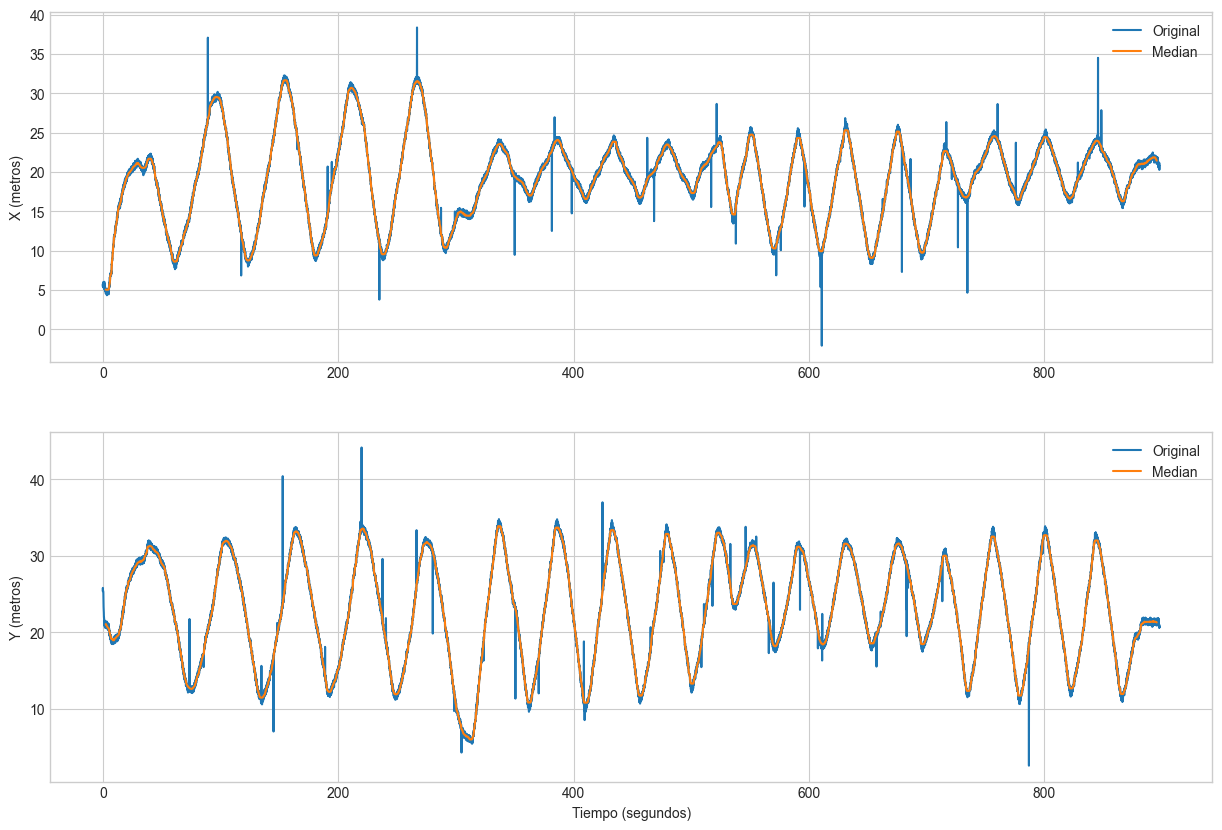

In [113]:
# Obtain the median filtered for X and Y
df_player['X_median'] = df_player['X'].rolling(50, center=True).median()
df_player['Y_median'] = df_player['Y'].rolling(50, center=True).median()

# Plot the data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))


t = np.linspace(0, len(df_player)*0.1, len(df_player))

axs[0].plot(t,df_player['X'], label='Original')
axs[0].plot(t,df_player['X_median'], label='Median')
axs[0].set_ylabel('X (metros)')
axs[0].legend()

axs[1].plot(t,df_player['Y'], label='Original')
axs[1].plot(t,df_player['Y_median'], label='Median')
axs[1].set_ylabel('Y (metros)')
axs[1].set_xlabel('Tiempo (segundos)')
axs[1].legend()

plt.show()

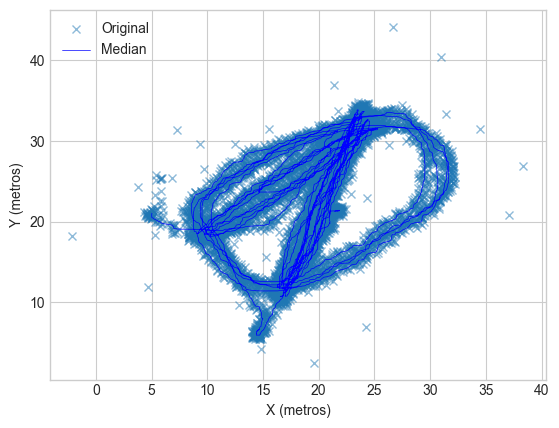

In [114]:
# 2D plot
plt.plot(df_player['X'], df_player['Y'], 'x', label='Original', lw = 0.5, alpha=0.5)
plt.plot(df_player['X_median'], df_player['Y_median'], '-b', label='Median', lw = 0.5)

plt.legend()
plt.xlabel('X (metros)')
plt.ylabel('Y (metros)')
plt.show()